In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('WhCuD.csv')

In [4]:
print("Number of rows: ",df.shape) # check number of rows and columns
print("Value in series missing: ",df.isnull().values.any()) # determine if value in series missing
df.dtypes

Number of rows:  (440, 8)
Value in series missing:  False


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

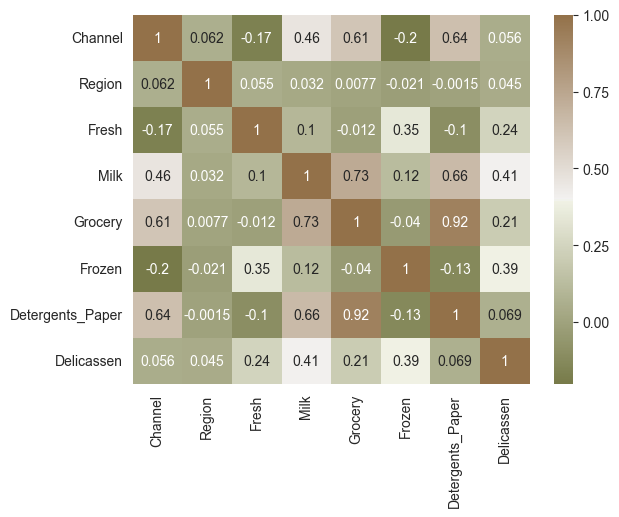

In [5]:
# Correlation between variables

cor = df.corr()
clrmap = sns.diverging_palette(90, 50, s=60, as_cmap=True)

sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=clrmap, annot=True)
sns.set(rc={'figure.figsize':(20,10)},font_scale=2.4)

0.92 Detergents_Paper - Grocery
0.66 Detergents_Paper - Milk
0.64 DP - Channel

0.73 Grocery - Milk
0.61 Grocery - Channel

0.46 Channel - Milk

0.062 Channel - Region

0.055 Region - Fresh
0.35 Fresh - Frozen

0.12 Milk - Frozen

0.39 Delicassen - Frozen
0.24 Delicassen - Fresh

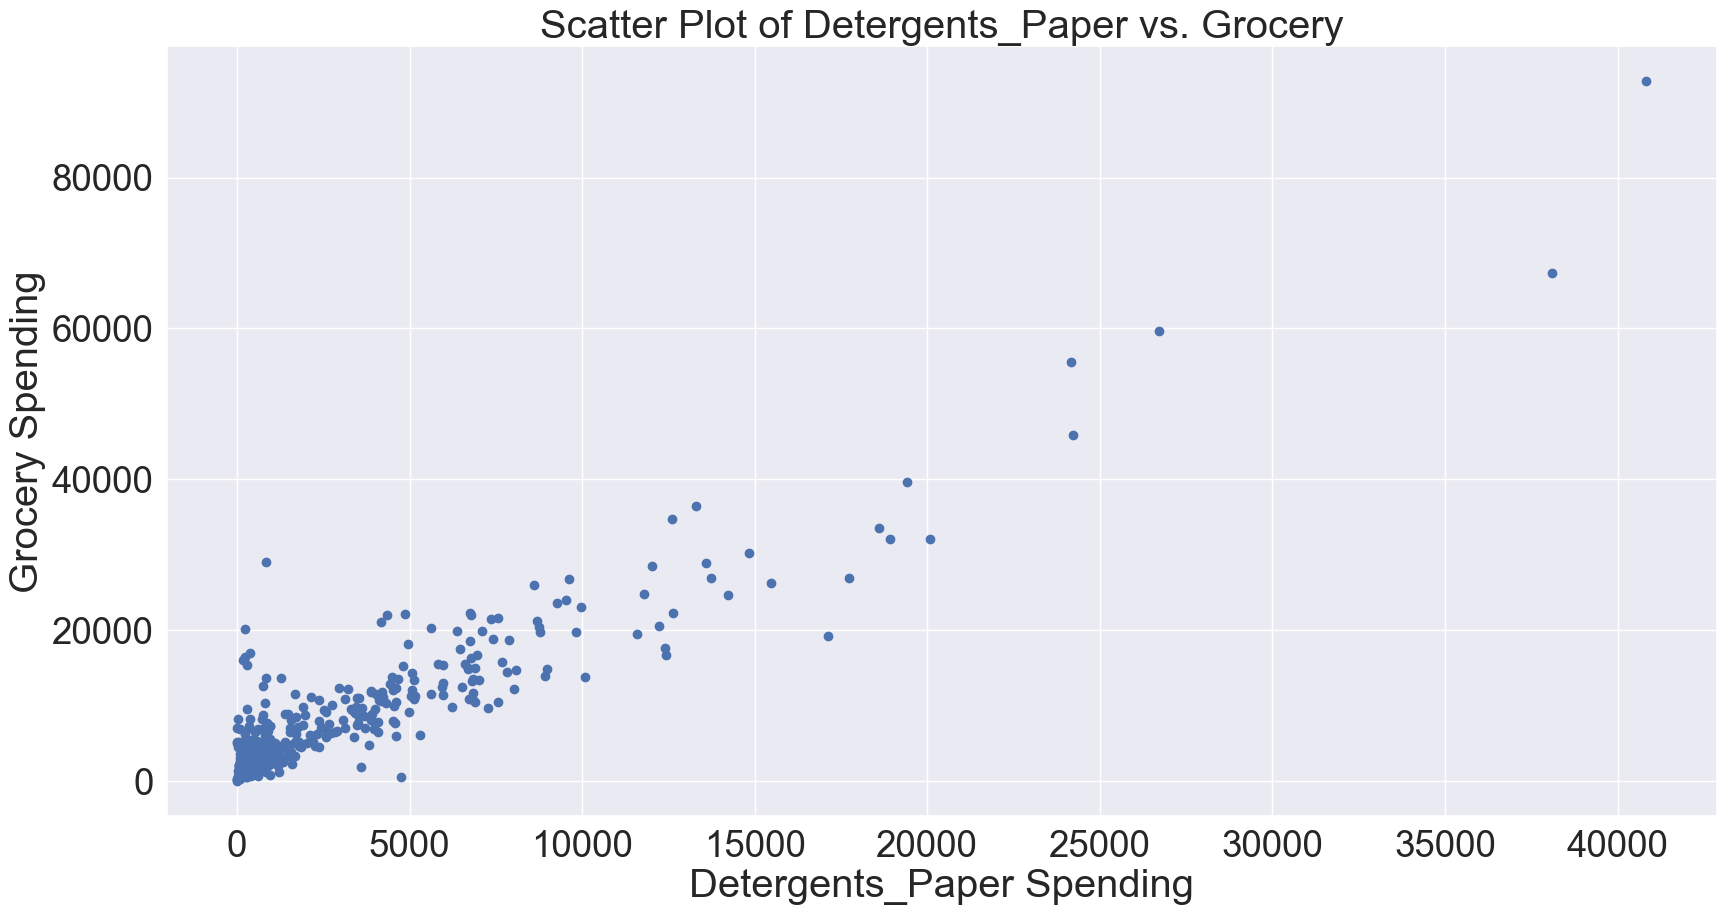

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot of "Detergents_Paper" vs. "Grocery"
plt.scatter(df['Detergents_Paper'], df['Grocery'])
plt.title('Scatter Plot of Detergents_Paper vs. Grocery')
plt.xlabel('Detergents_Paper Spending')
plt.ylabel('Grocery Spending')

# Show the plot
plt.show()

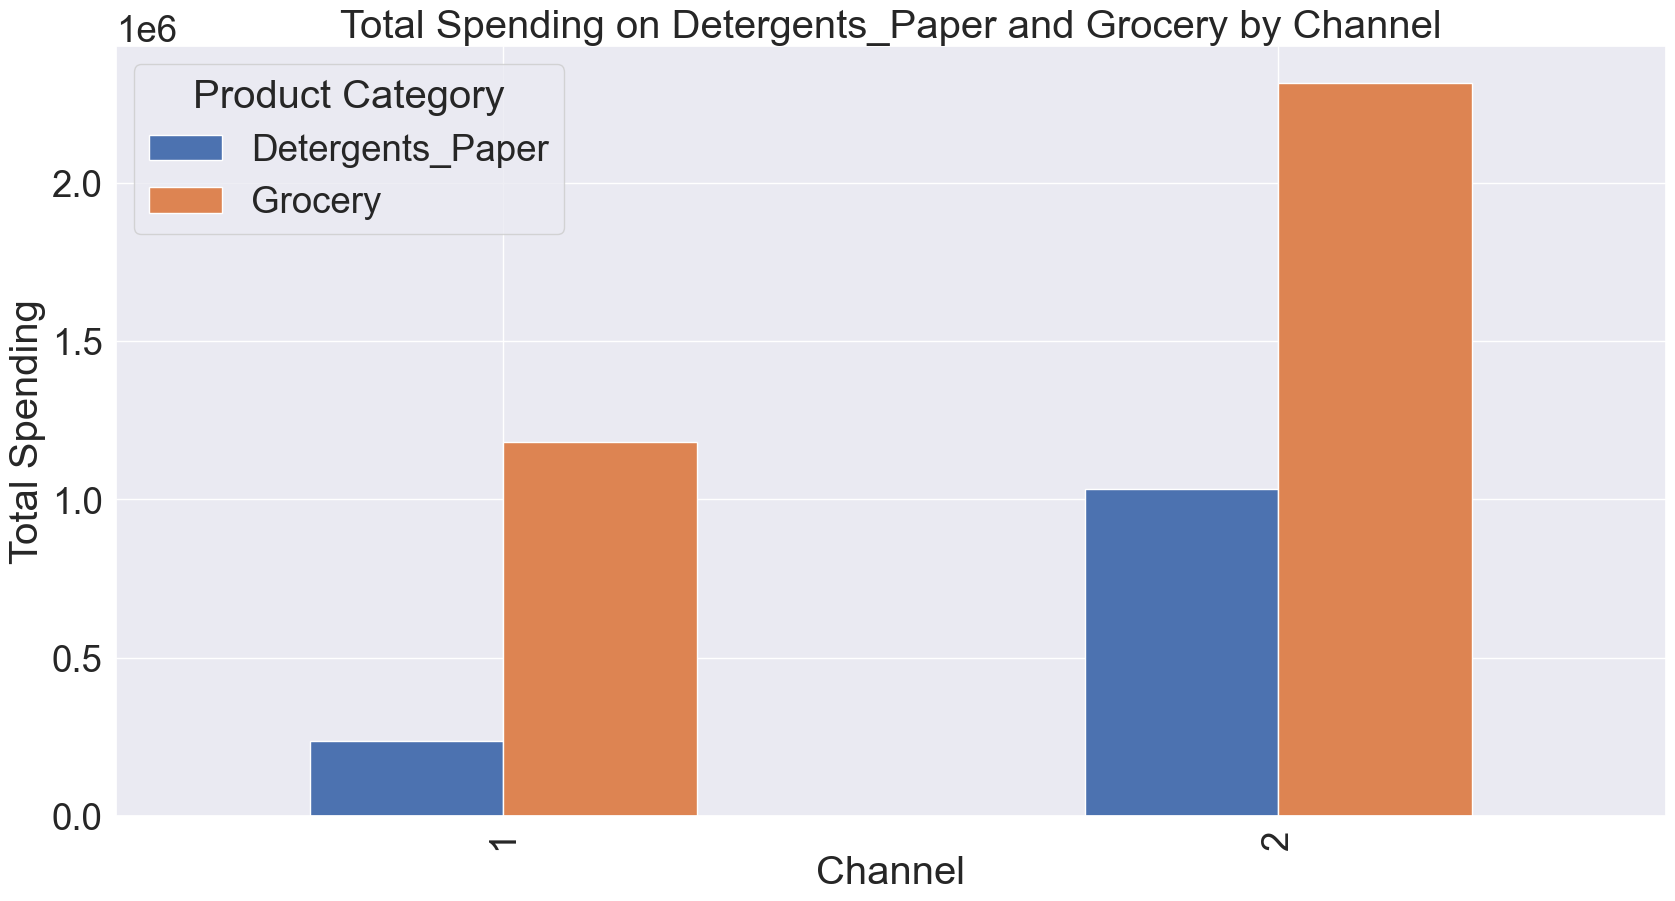

In [7]:
# Group the data by 'Channel' and calculate the total spending on "Detergents_Paper" and "Grocery"
channel_spending = df.groupby('Channel').sum()[['Detergents_Paper', 'Grocery']]

# Create a bar chart to visualize total spending on "Detergents_Paper" and "Grocery" by channel
channel_spending.plot(kind='bar')
plt.title('Total Spending on Detergents_Paper and Grocery by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Spending')
plt.legend(title='Product Category')

# Show the plot
plt.show()

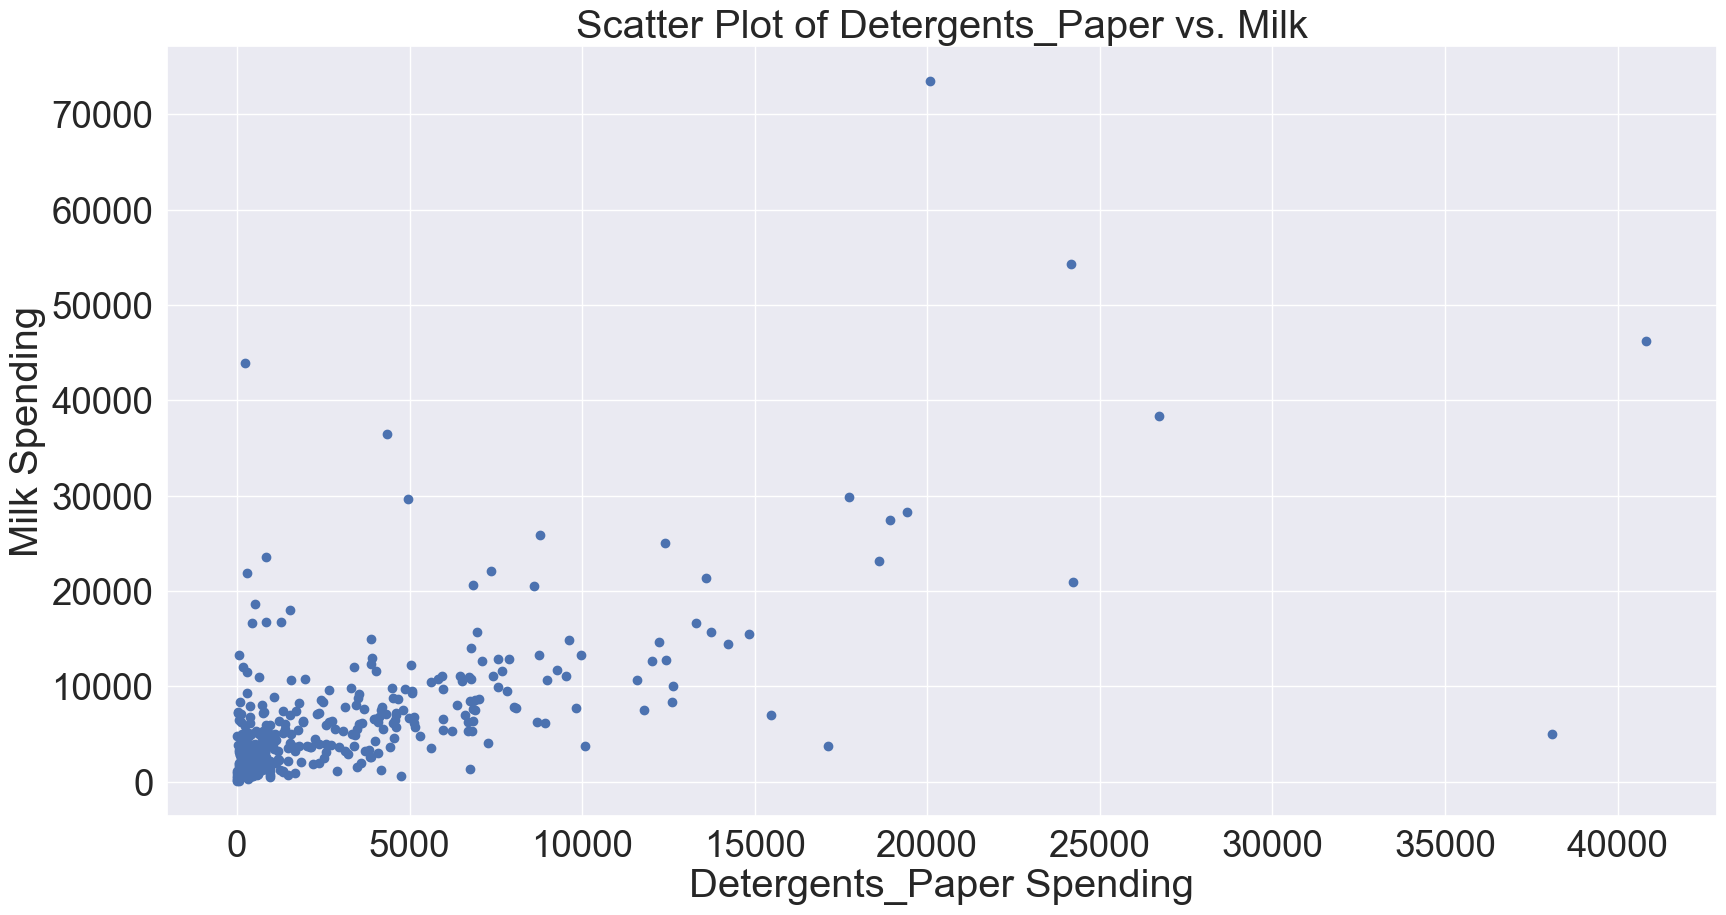

In [8]:
plt.scatter(df['Detergents_Paper'], df['Milk'])
plt.title('Scatter Plot of Detergents_Paper vs. Milk')
plt.xlabel('Detergents_Paper Spending')
plt.ylabel('Milk Spending')

# Show the plot
plt.show()

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


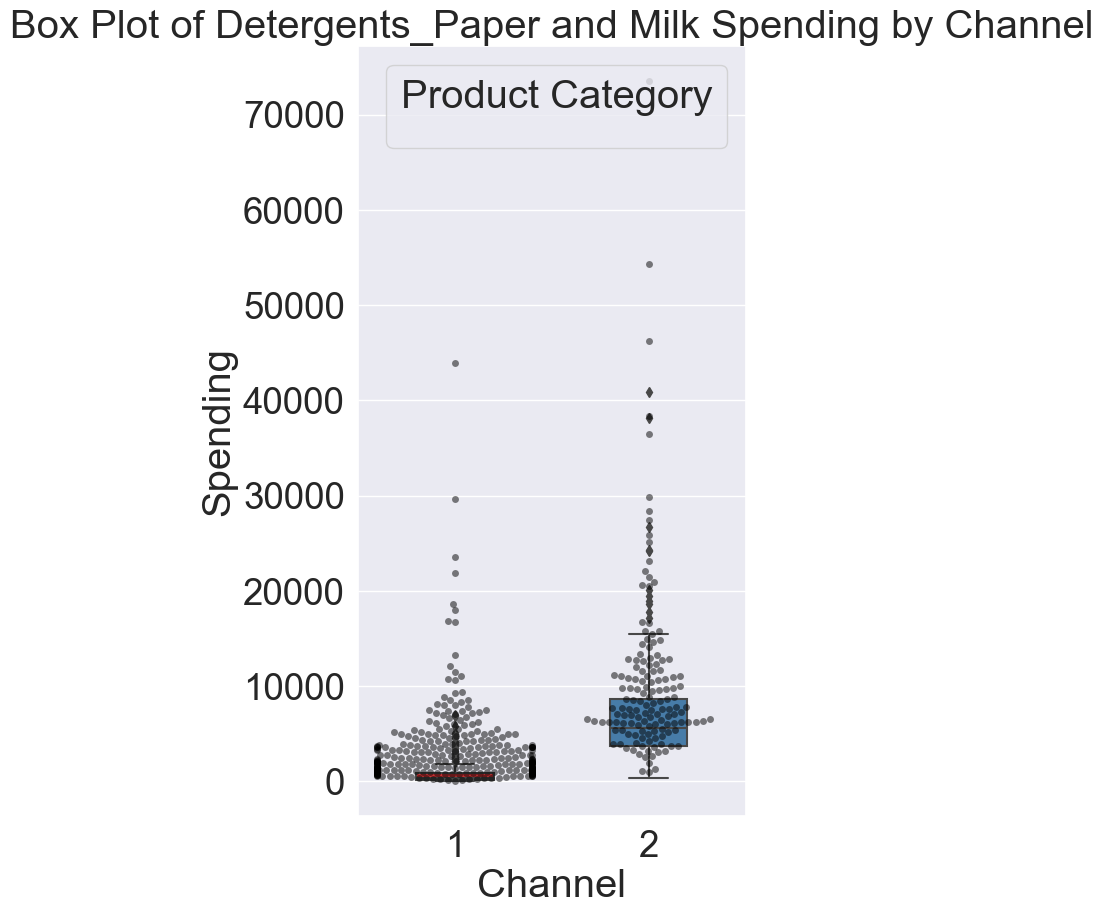

In [9]:
plt.figure(figsize=(5, 10))
sns.boxplot(x='Channel', y='Detergents_Paper', data=df, palette='Set1', width=0.4)
sns.swarmplot(x='Channel', y='Milk', data=df, color='black', size=5, alpha=0.5)
plt.title('Box Plot of Detergents_Paper and Milk Spending by Channel')
plt.xlabel('Channel')
plt.ylabel('Spending')
plt.legend(title='Product Category')

# Show the plot
plt.show()

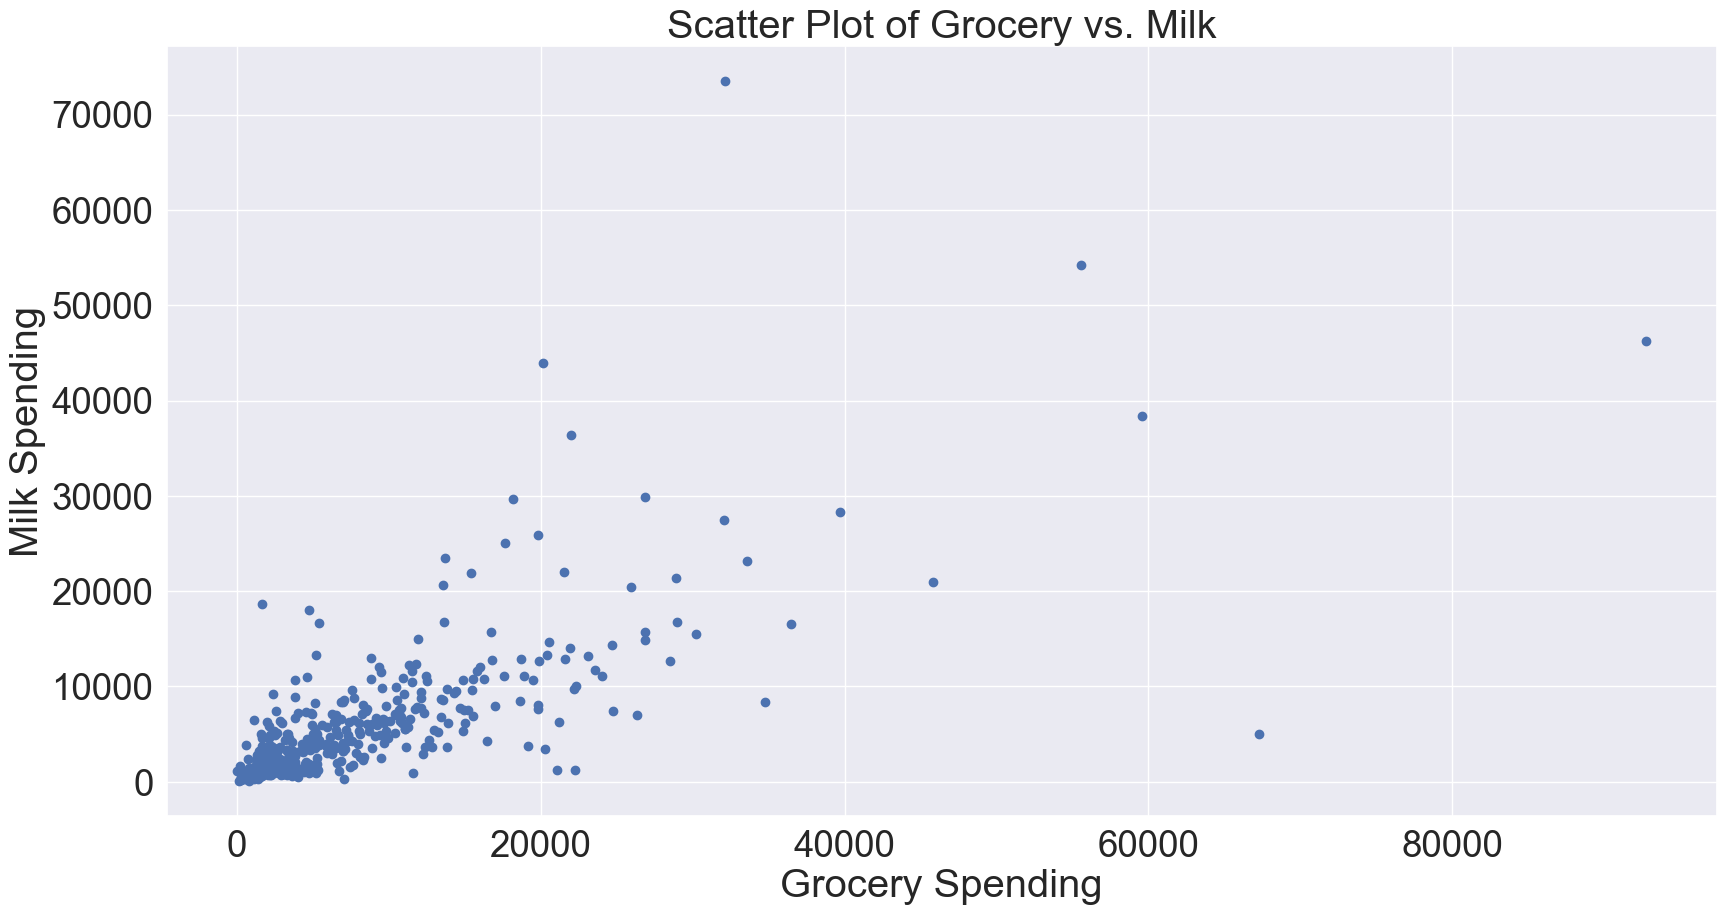

In [10]:
# Create a scatter plot of "Grocery" vs. "Milk"
plt.scatter(df['Grocery'], df['Milk'])
plt.title('Scatter Plot of Grocery vs. Milk')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')

# Show the plot
plt.show()

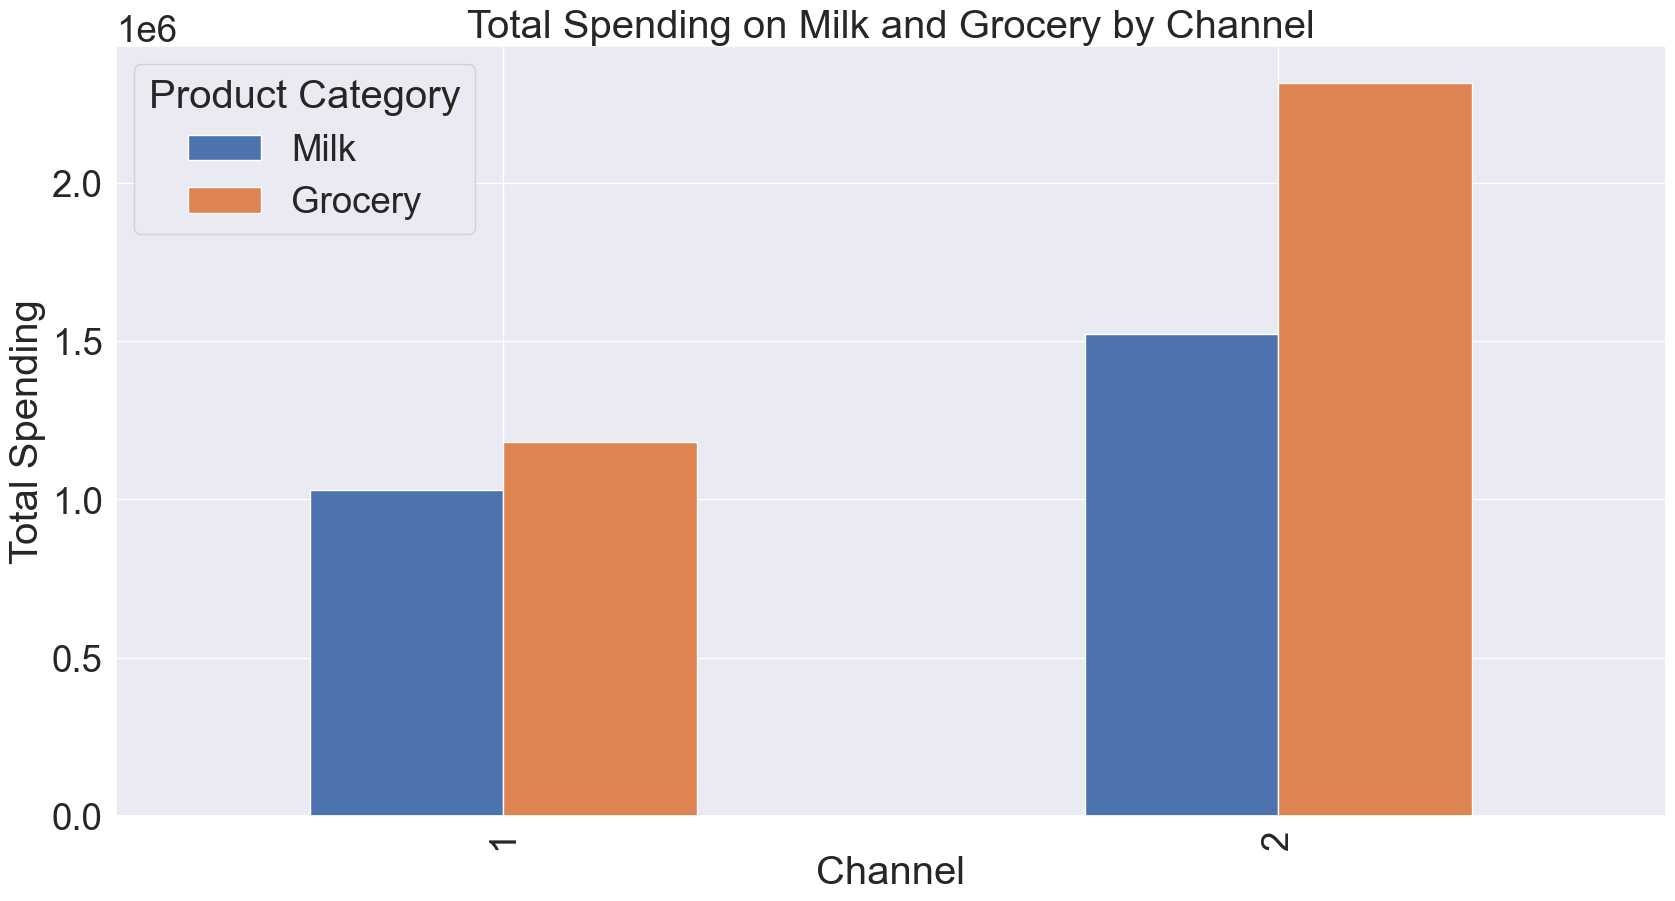

In [11]:
# Group the data by 'Channel' and calculate the total spending on "Milk" and "Grocery"
channel_spending = df.groupby('Channel').sum()[['Milk', 'Grocery']]

# Create a bar chart to visualize total spending on "Milk" and "Grocery" by channel
channel_spending.plot(kind='bar')
plt.title('Total Spending on Milk and Grocery by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Spending')
plt.legend(title='Product Category')

# Show the plot
plt.show()

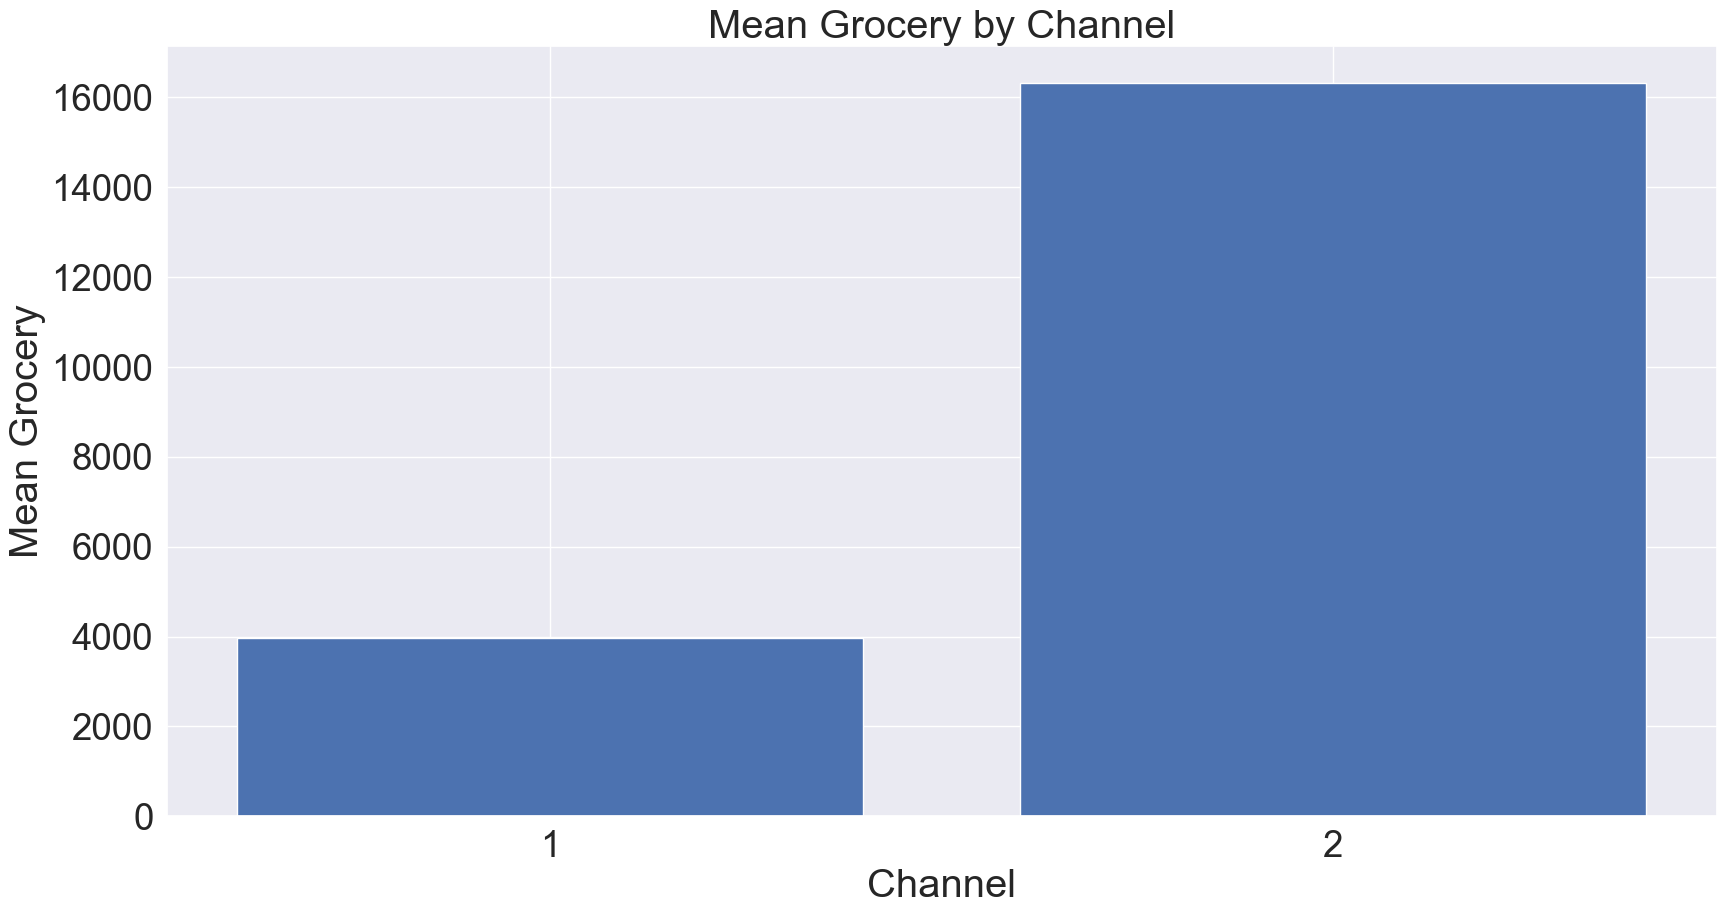

In [12]:
# Group the data by 'Channel' and calculate the mean of 'Grocery' for each channel
channel_grocery_mean = df.groupby('Channel')['Grocery'].mean()

# Create a bar plot
plt.bar(channel_grocery_mean.index, channel_grocery_mean)
plt.xlabel('Channel')
plt.ylabel('Mean Grocery')
plt.title('Mean Grocery by Channel')
plt.xticks(channel_grocery_mean.index)
plt.show()

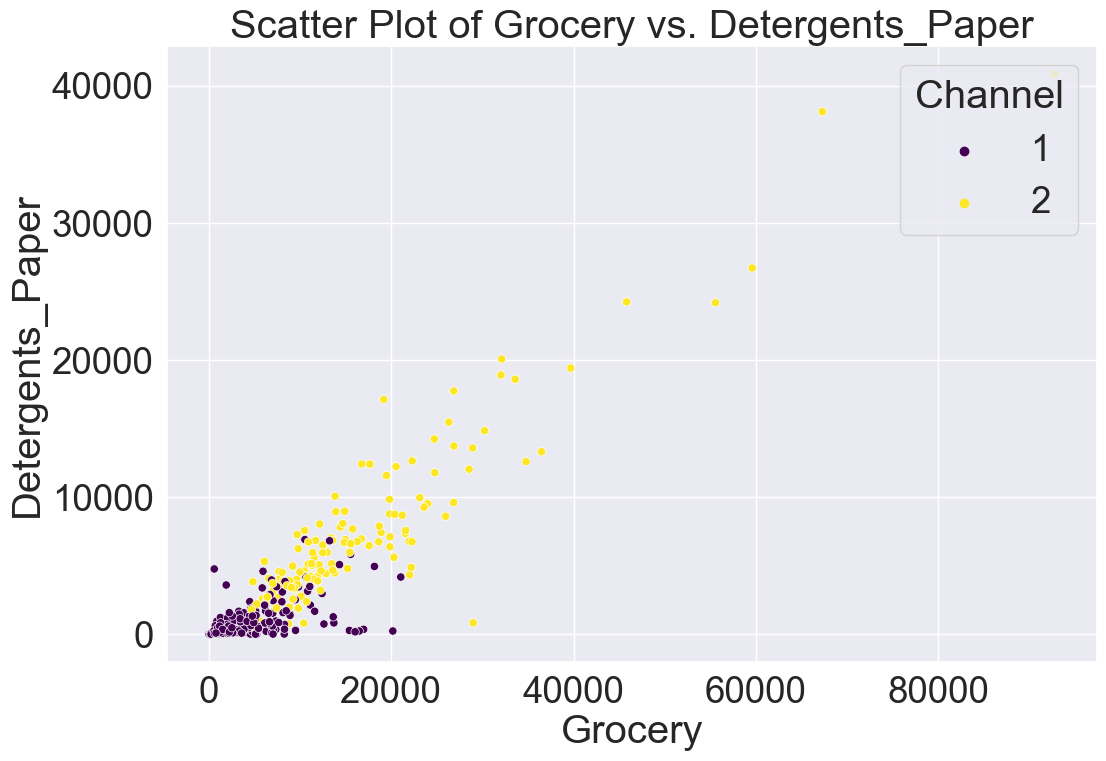

In [13]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Grocery', y='Detergents_Paper', data=df, hue='Channel', palette='viridis')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Scatter Plot of Grocery vs. Detergents_Paper')
plt.legend(title='Channel', loc='upper right')
plt.show()

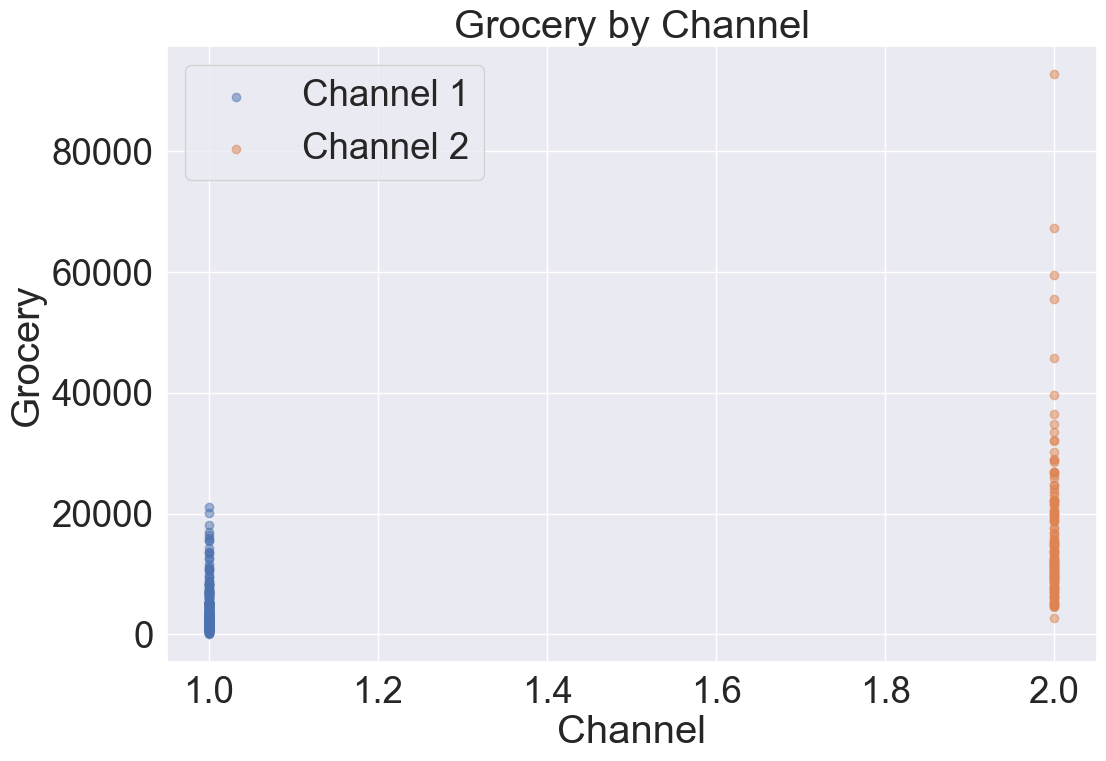

In [14]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df[df['Channel'] == 1]['Channel'], df[df['Channel'] == 1]['Grocery'], label='Channel 1', alpha=0.5)
plt.scatter(df[df['Channel'] == 2]['Channel'], df[df['Channel'] == 2]['Grocery'], label='Channel 2', alpha=0.5)
plt.xlabel('Channel')
plt.ylabel('Grocery')
plt.title('Grocery by Channel')
plt.legend()
plt.show()

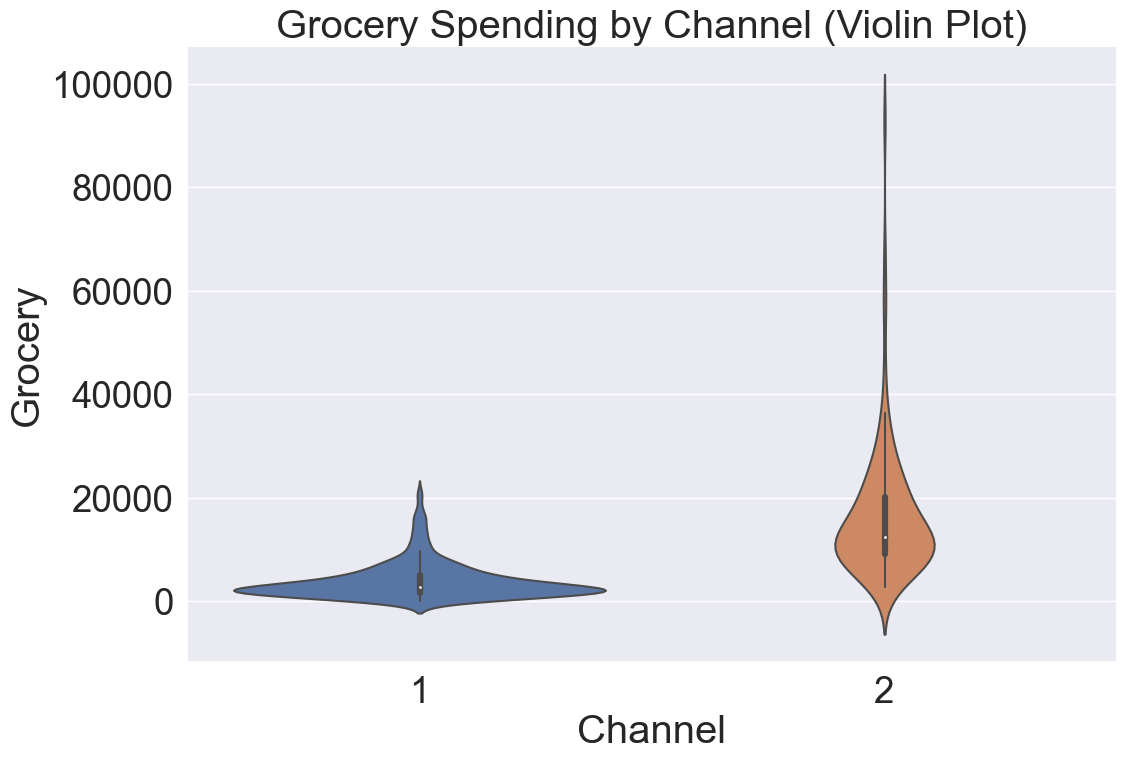

In [15]:
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Channel', y='Grocery', data=df)
plt.xlabel('Channel')
plt.ylabel('Grocery')
plt.title('Grocery Spending by Channel (Violin Plot)')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define your target variable (y) and features (X)
# For example, if you want to predict 'Channel' based on other features
y = df['Channel']
X = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.93
Confusion Matrix:
[[62  3]
 [ 3 20]]
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        65
           2       0.87      0.87      0.87        23

    accuracy                           0.93        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.93      0.93      0.93        88



In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset from a CSV file
df = pd.read_csv('WhCuD.csv')

# Define your target variable (y) and features (X)
y = df['Channel']
X = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Define hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a logistic regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy of the Best Model: {accuracy:.2f}')

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/aristarcharistarchovich/DataspellProj

Best Hyperparameters: {'C': 0.001, 'solver': 'newton-cg'}
Accuracy of the Best Model: 0.93


/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


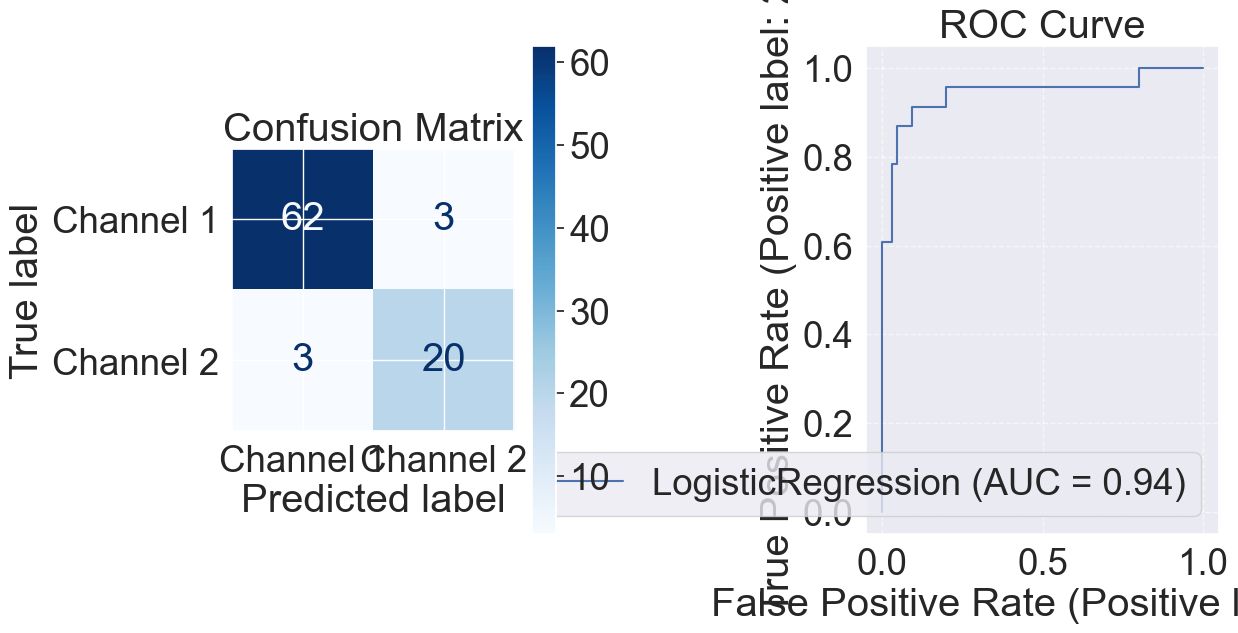

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Create subplots for visualizations
fig, axes = plt.subplots(1, 2, figsize=(13, 7))

# Visualize the confusion matrix
confusion_matrix_display = plot_confusion_matrix(model, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues, display_labels=['Channel 1', 'Channel 2'])
confusion_matrix_display.ax_.set_title('Confusion Matrix')
plt.grid(None)  # Remove grid lines

# Visualize the ROC curve
roc_curve_display = plot_roc_curve(model, X_test, y_test, ax=axes[1])
roc_curve_display.ax_.set_title('ROC Curve')
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines

plt.tight_layout()  # Ensure subplots don't overlap

plt.show()

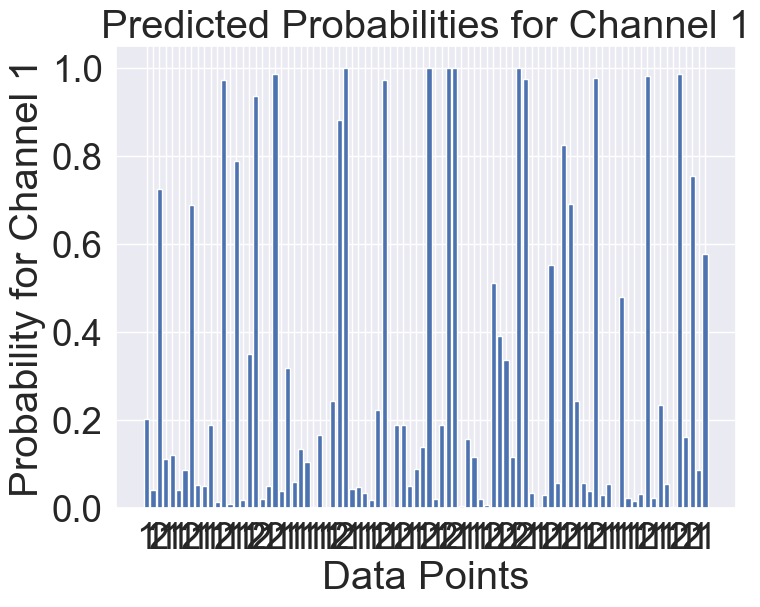

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a logistic regression model (if you haven't already)
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict class probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (Channel 1)
positive_class_probabilities = y_pred_proba[:, 1]

# Create a bar chart to visualize the predicted probabilities
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(positive_class_probabilities)), positive_class_probabilities, tick_label=y_test.values)
plt.xlabel('Data Points')
plt.ylabel('Probability for Channel 1')
plt.title('Predicted Probabilities for Channel 1')
plt.show()

In [20]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [21]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)
predictedDis = regr.predict([[2, 5000, 1200, 7684, 1700, 2600, 5000]])
print(predictedDis)

[1.32425149]


/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


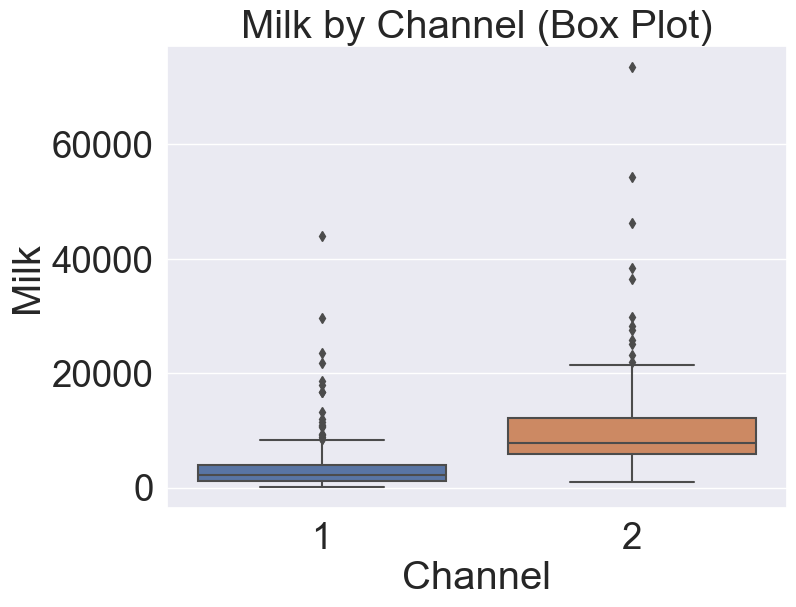

In [22]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel', y='Milk', data=df)
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Milk by Channel (Box Plot)')
plt.show()

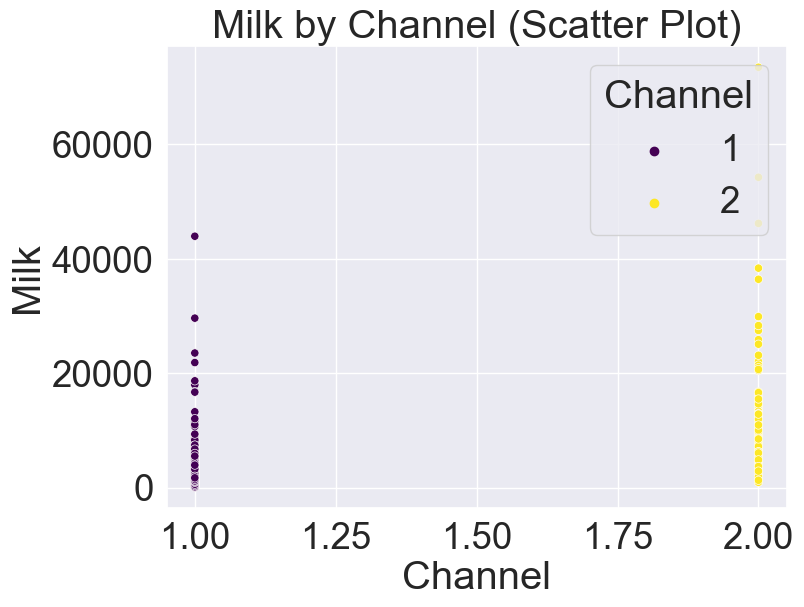

In [23]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Channel', y='Milk', data=df, hue='Channel', palette='viridis')
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Milk by Channel (Scatter Plot)')
plt.legend(title='Channel', loc='upper right')
plt.show()

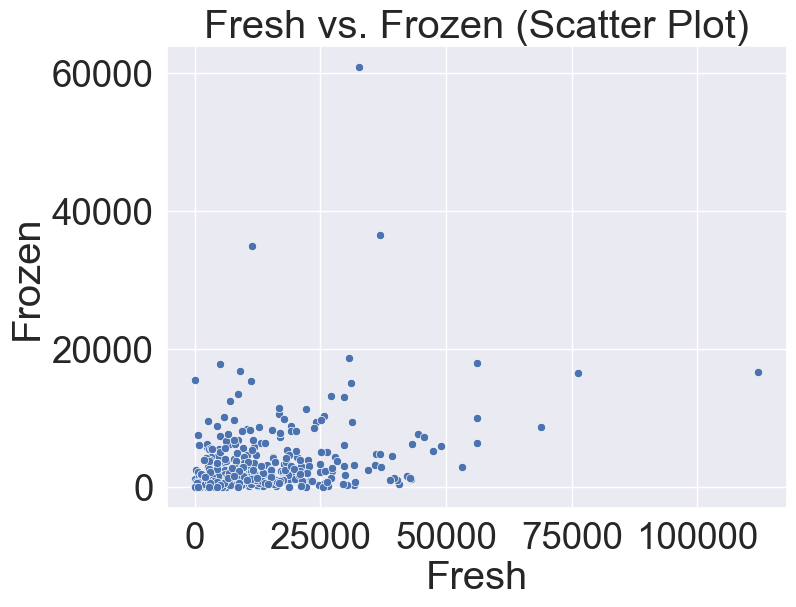

In [24]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Frozen', data=df)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs. Frozen (Scatter Plot)')
plt.show()

<Figure size 800x600 with 0 Axes>

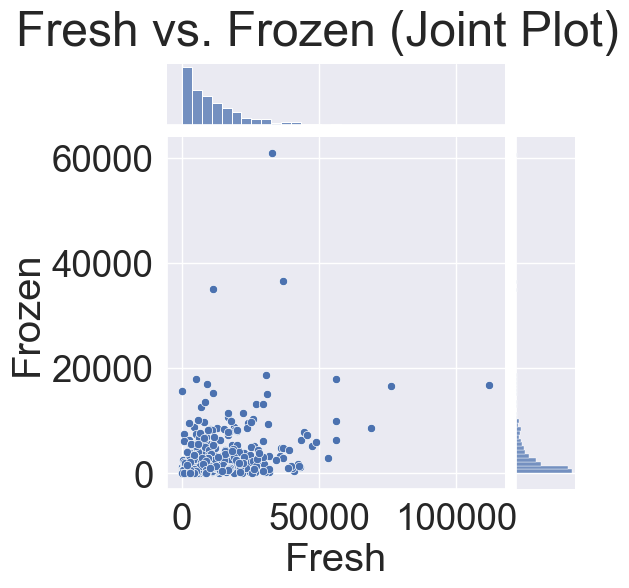

In [25]:
# Create a joint plot
plt.figure(figsize=(8, 6))
sns.jointplot(x='Fresh', y='Frozen', data=df, kind='scatter')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.suptitle('Fresh vs. Frozen (Joint Plot)', y=1.02)
plt.show()

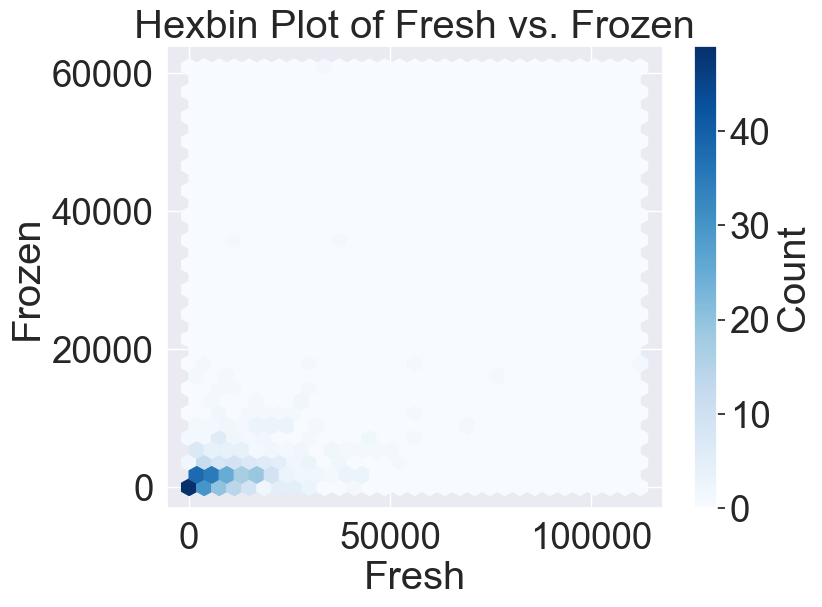

In [26]:
# Create a hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['Fresh'], df['Frozen'], gridsize=30, cmap='Blues')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Hexbin Plot of Fresh vs. Frozen')
plt.colorbar(label='Count')
plt.show()

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


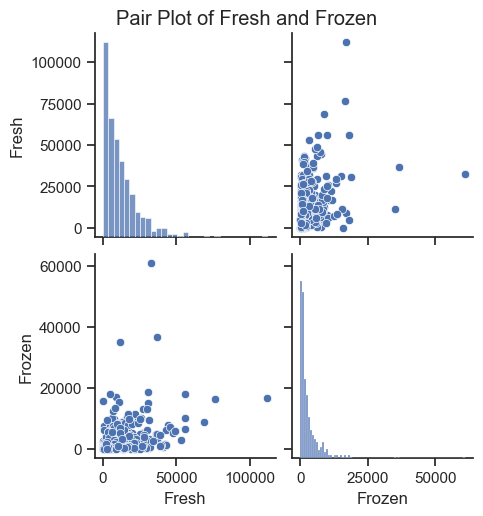

In [27]:
# Create a pair plot
sns.set(style="ticks")
sns.pairplot(df, vars=["Fresh", "Frozen"], kind="scatter", palette="Blues")
plt.suptitle('Pair Plot of Fresh and Frozen', y=1.02)
plt.show()

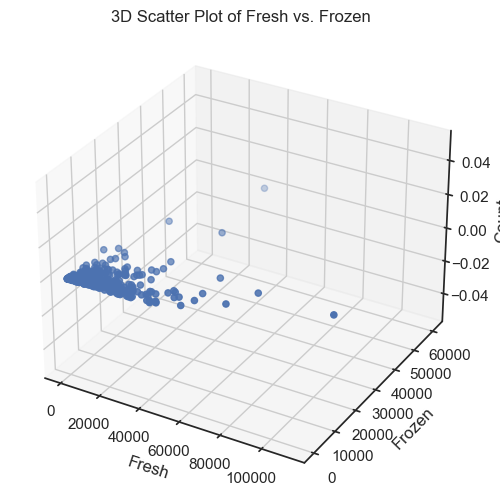

In [28]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Fresh'], df['Frozen'], c='b', marker='o')
ax.set_xlabel('Fresh')
ax.set_ylabel('Frozen')
ax.set_zlabel('Count')
ax.set_title('3D Scatter Plot of Fresh vs. Frozen')
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# Load your dataset from a CSV file (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('WhCuD.csv')

# Select the features you want to use for clustering (e.g., Grocery and Milk)
selected_features = df[['Grocery', 'Milk']].values

# Convert the data to a NumPy array
data = np.array(selected_features)

# Choose parameters for the DBSCAN algorithm
eps = 100  # Maximum distance between samples for them to be considered as part of the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point

# Create a DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Perform clustering
cluster_assignments = dbscan.fit_predict(data)

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_assignments

# Print the cluster assignments
print(df[['Channel', 'Region', 'Grocery', 'Milk', 'Cluster']])

     Channel  Region  Grocery   Milk  Cluster
0          2       3     7561   9656       -1
1          2       3     9568   9810       -1
2          2       3     7684   8808       -1
3          1       3     4221   1196       -1
4          2       3     7198   5410       -1
..       ...     ...      ...    ...      ...
435        1       3    16027  12051       -1
436        1       3      764   1431       -1
437        2       3    30243  15488       -1
438        1       3     2232   1981       -1
439        1       3     2510   1698       -1

[440 rows x 5 columns]


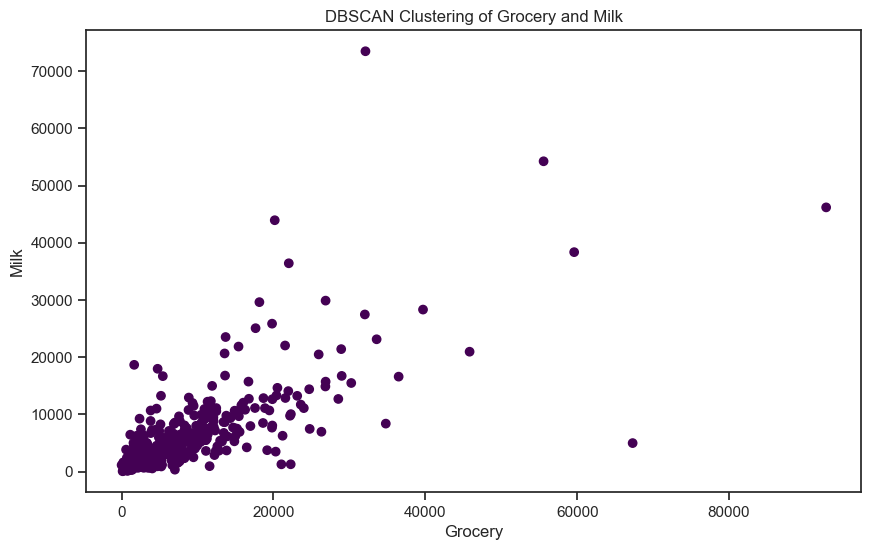

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load your dataset from a CSV file (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('WhCuD.csv')

# Select the features you want to use for clustering (e.g., Grocery and Milk)
selected_features = df[['Grocery', 'Milk']].values

# Convert the data to a NumPy array
data = np.array(selected_features)

# Choose parameters for the DBSCAN algorithm
eps = 100  # Maximum distance between samples for them to be considered as part of the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point

# Create a DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Perform clustering
cluster_assignments = dbscan.fit_predict(data)

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_assignments

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Grocery'], df['Milk'], c=df['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Grocery and Milk')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

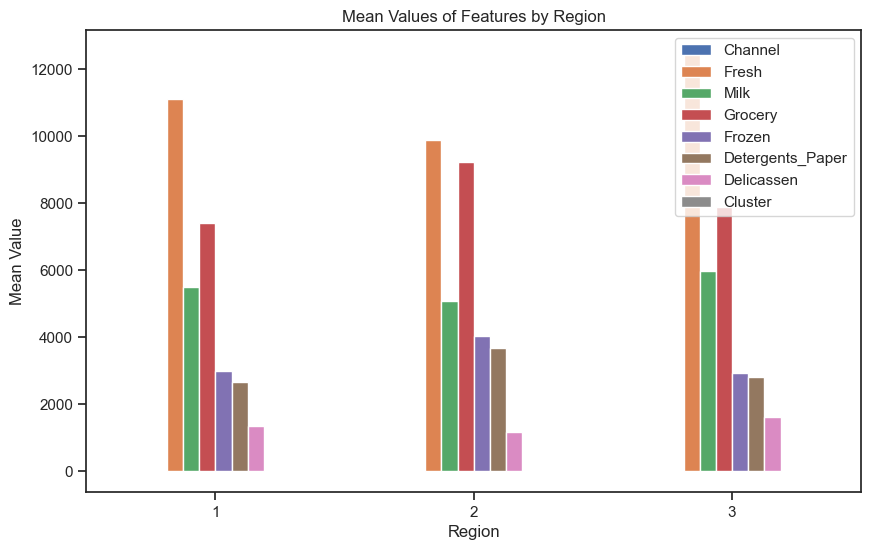

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping by 'Region' and calculating the mean of each feature
region_means = df.groupby('Region').mean()

# Plotting bar charts for each feature
region_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Features by Region')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(loc='upper right')
plt.show()

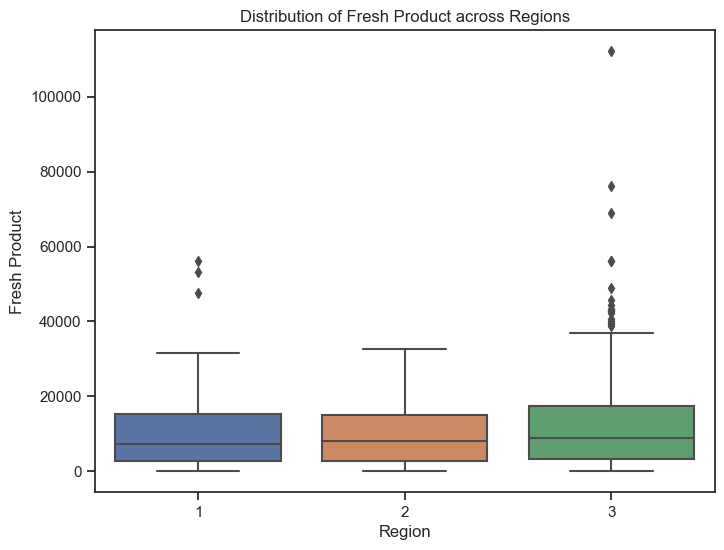

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a boxplot for 'Fresh' feature across different regions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Fresh', data=df)
plt.title('Distribution of Fresh Product across Regions')
plt.xlabel('Region')
plt.ylabel('Fresh Product')
plt.show()